In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

Each row is a data point. 
784 pixels per data point. (i.e. per X)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
print('m rows: ', m, 'n cols: ', n)

m rows:  42000 n cols:  785


In [5]:
np.random.shuffle(data) 
# shuffle the data to prevent order based bias
# allows model to converge quicker as it's exposed to wide variety of data

data_dev = data[0:1000].T # now each col is an example instead of each row
data_dev.shape

(785, 1000)

In [6]:
Y_dev = data_dev[0]
Y_dev # labels
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # pixels

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

_, m_train = X_train.shape

In [7]:
Y_train

array([8, 4, 2, ..., 6, 0, 0])

In [8]:
Y_train.size

41000

In [9]:
X_train[:, 0].shape # first column all rows

(784,)

In [10]:
def init_params():
    # each col is an example
    # X : (784 x m)
    # hidden layer: 10 nodes: (10 x m) - - Z
    # bias: (10 x m)
    # Z = W.X + b
    W1 = np.random.rand(10, 784) * 0.01
    b1 = np.zeros((10, 1))

    W2 = np.random.rand(10, 10) * 0.01
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2

def ReLU(Z): 
    # this goes through every element in Z
    return np.maximum(Z, 0) # 0 if z <= 0 else z : z is a matrix (10 x m)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    # sum up through each column 
    # ie. collapses the amount of rows to 1

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) # predicted Y
    return Z1, A1, Z2, A2

# did not understand this well
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derive_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0) # this returns index of maximum value along col
    # so this will return the index at which the value = 1
    # which will be the actual label i.e. 0,1,2...9

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iterations: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iterations:  0
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  10
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  20
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  30
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  40
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  50
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  60
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  70
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.0981219512195122
Iterations:  80
[0 0 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.1005609756097561
Iterations:  90
[0 6 0 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.11934146341463414
Iterations:  100
[0 6 6 ... 0 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.17712195121951219
Iterations:  110
[3 6 6 ... 6 0 0] [8 4 2 ... 6 0 0]
Accuracy:  0.24478048780487804
Iterations: 

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


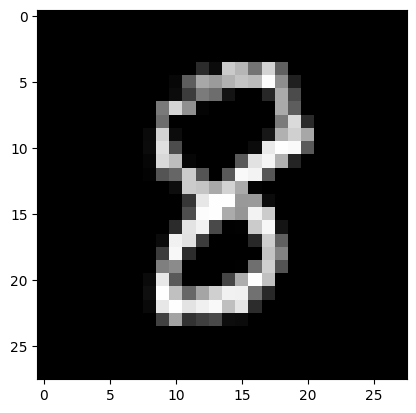

Prediction:  [4]
Label:  4


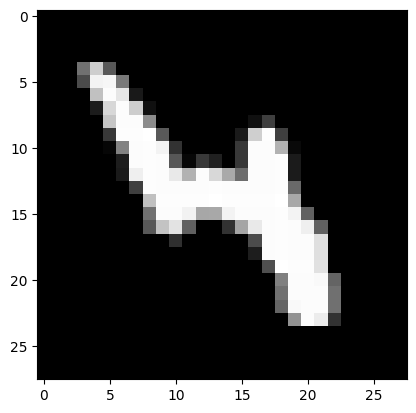

Prediction:  [2]
Label:  2


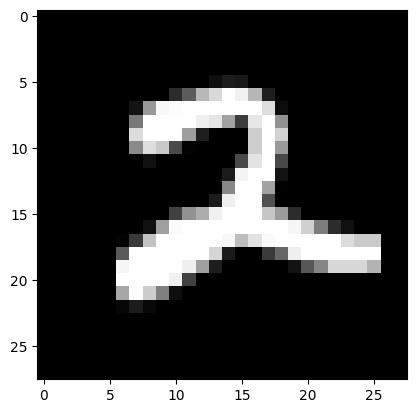

Prediction:  [2]
Label:  2


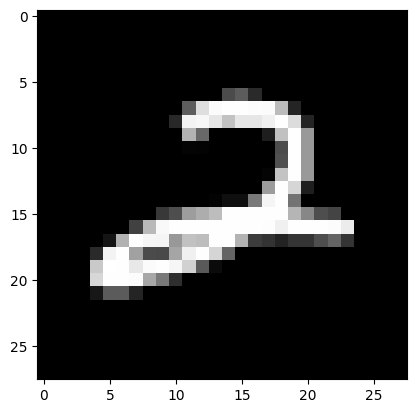

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 1 2 1 2 9 2 7 1 0 9 2 4 6 7 5 2 0 0 6 1 0 3 9 3 0 4 0 2 2 8 0 0 8 6 6 4
 7 8 4 0 1 9 3 6 6 3 7 9 9 7 8 2 5 8 9 7 7 9 4 9 1 5 4 1 2 2 6 3 7 1 9 8 3
 5 7 4 1 8 3 4 4 0 8 1 5 7 6 2 1 5 7 8 4 6 3 4 5 9 8 5 5 2 2 0 9 6 1 0 2 6
 0 1 6 0 5 2 0 2 0 0 8 5 3 0 0 6 5 2 5 6 6 1 1 9 8 1 4 2 7 3 3 6 6 6 4 1 7
 6 2 8 4 7 4 2 9 6 6 7 1 7 9 4 5 1 4 6 5 5 7 6 3 5 4 1 7 0 5 4 3 5 6 2 8 3
 8 2 3 0 1 7 6 5 1 9 3 3 1 0 7 5 0 2 6 6 0 6 8 0 1 2 3 4 1 3 5 4 6 2 5 5 1
 6 5 4 4 4 9 9 2 7 1 6 2 9 8 1 3 8 1 4 8 2 2 5 6 1 5 4 5 2 3 8 8 3 6 3 5 3
 7 9 8 1 9 7 2 0 6 2 7 4 7 8 7 1 4 2 2 3 7 7 8 8 2 0 8 1 4 7 1 8 7 3 8 2 7
 7 1 7 9 9 8 1 1 2 6 5 3 1 6 9 1 5 4 3 6 4 9 5 6 7 1 1 2 8 3 6 1 6 4 4 2 9
 9 6 1 7 7 5 0 8 3 4 3 9 6 6 8 7 6 4 6 3 7 7 2 2 7 4 4 0 6 0 7 2 0 4 7 1 9
 8 5 0 9 6 8 5 5 6 1 9 1 9 7 8 9 2 2 8 0 8 5 2 6 3 9 7 7 5 5 3 0 0 3 5 9 9
 8 0 6 4 1 7 6 8 3 9 9 5 9 2 6 9 2 1 5 2 9 6 4 9 3 0 6 3 7 5 1 3 5 8 1 7 7
 9 8 4 1 9 6 8 0 9 8 6 4 4 4 9 7 8 0 0 8 4 4 3 2 1 7 5 6 4 1 6 8 5 1 1 6 7
 6 3 9 6 6 8 5 8 8 7 9 2 

0.878